# Carregar o dataset Fashion MNIST

In [143]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Achatar as imagens

In [144]:
(count, width, height) = train_images.shape
train_images = train_images.reshape((count, width * height))

(count, width, test_height) = test_images.shape
test_images = test_images.reshape((count, width * height))

# Normalizar as imagens

In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Categorizar as labels

In [146]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Contruir o modelo MPL

In [147]:
from keras import models, layers

modelo = models.Sequential()
modelo.add(layers.Dense(512, activation='relu', input_shape=(width * height,)))
modelo.add(layers.Dense(256, activation='relu'))
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo

In [148]:
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo

In [149]:
modelo.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.4781 - accuracy: 0.8266
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.3583 - accuracy: 0.8666
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.3244 - accuracy: 0.8791
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 0.2970 - accuracy: 0.8894
Epoch 5/5
938/938 [==============================] - 9s 10ms/step - loss: 0.2793 - accuracy: 0.8942


# Avaliar o modelo

In [150]:
(test_loss, test_acc) = modelo.evaluate(test_images, test_labels)

print(f'\nAcurácia: {test_acc * 100:.2f}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.3350 - accuracy: 0.8809

Acurácia: 88.09%



# Previsões no conjunto de teste

In [151]:
pred_labels = modelo.predict(test_images).argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


# Matriz de confusão

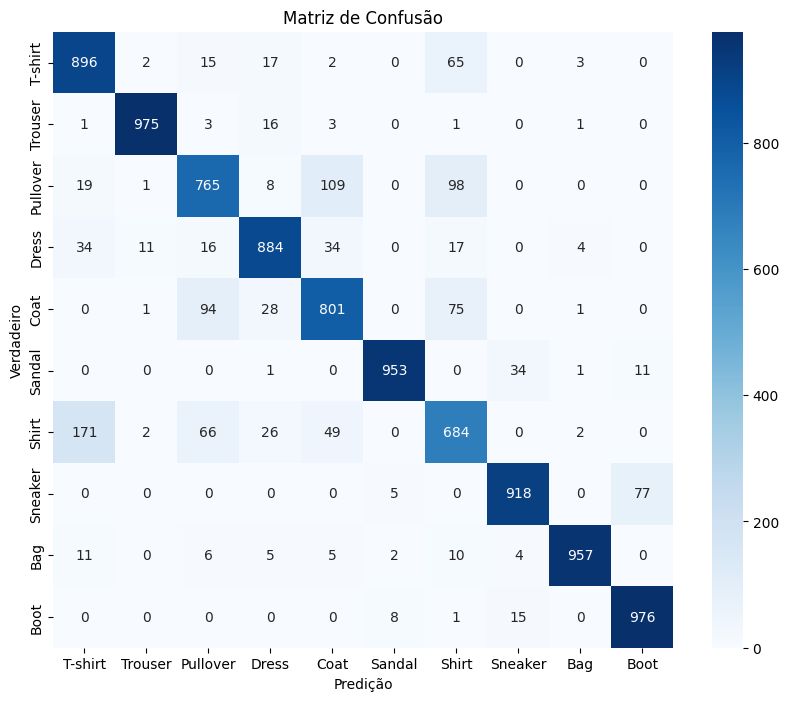

In [153]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Nomes das classes do Fashion MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()